In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [3]:
import pandas as pd 
data = pd.read_csv("heart.csv") 
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
3,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
4,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1


In [4]:
data.shape

(297, 14)

In [5]:
X = data.drop(['num'], axis = 1)
y = data.num.values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [8]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='gini',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
knn_ac=accuracy_score(knn_pred,y_test)

In [9]:
print("DecisionTree_accuracy:\t\t {:.2f}% \n".format(dtree_ac*100))

print("RandomForest_accuracy:\t\t {:.2f}% \n".format(rdf_ac*100))

print("KNN_accuracy:\t\t\t {:.2f}% \n".format(knn_ac*100))

DecisionTree_accuracy:		 73.11% 

RandomForest_accuracy:		 81.51% 

KNN_accuracy:			 80.67% 



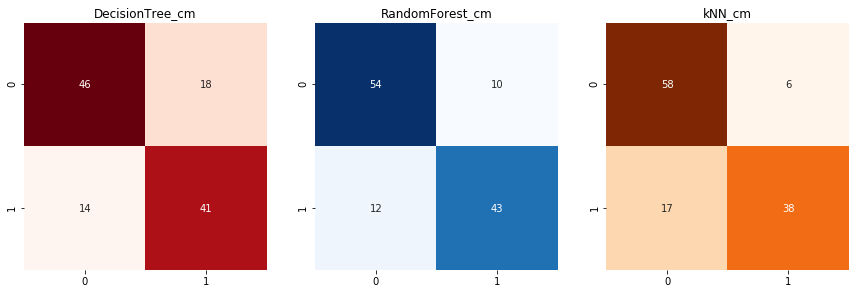

In [14]:
plt.figure(figsize=(20,10))


plt.subplot(2,4,1)
plt.title("DecisionTree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Reds",fmt="d",cbar=False)

plt.subplot(2,4,2)
plt.title("RandomForest_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,4,3)
plt.title("kNN_cm")
sns.heatmap(knn_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
plt.show()

Text(0.5, 1.0, 'Model Accracy')

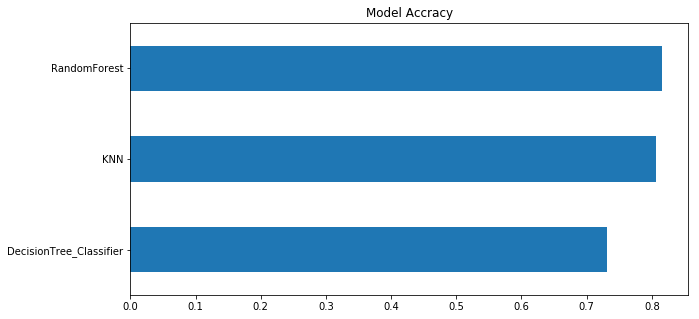

In [21]:
model_accuracy = pd.Series(data=[rdf_ac,knn_ac,dtree_ac], 
index=['RandomForest','KNN','DecisionTree_Classifier'])
fig= plt.figure(figsize=(10,5))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

In [12]:
from sklearn.metrics import classification_report

#RandomForest
print("Random Forest Accuracy:\t \n")
print(classification_report(y_test, rdf_pred))

# DecisionTree Classifier
print("Decision Tree Accuracy:\t \n")
print(classification_report(y_test, dtree_pred))


#KNN
print("KNN Accuracy:\t \n")
print(classification_report(y_test, knn_pred))


Random Forest Accuracy:	 

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        64
           1       0.81      0.78      0.80        55

   micro avg       0.82      0.82      0.82       119
   macro avg       0.81      0.81      0.81       119
weighted avg       0.82      0.82      0.81       119

Decision Tree Accuracy:	 

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        64
           1       0.69      0.75      0.72        55

   micro avg       0.73      0.73      0.73       119
   macro avg       0.73      0.73      0.73       119
weighted avg       0.73      0.73      0.73       119

KNN Accuracy:	 

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        64
           1       0.86      0.69      0.77        55

   micro avg       0.81      0.81      0.81       119
   macro avg       0.82      0.80      0.80       119
wei